# 📗 Regresión lineal simple — Cuaderno resuelto
*Incluye dos enfoques: manual y con `scikit-learn`.*
_Generado: 2025-10-08 08:27:47_

---

## 1) Cargar datos

In [1]:
# Datos del problema
horas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
calificaciones = [50, 55, 65, 70, 74, 78, 85, 88, 94, 96]
len(horas), len(calificaciones)

(10, 10)

## 2) Enfoque manual (sin `sklearn`)

In [2]:
# Cálculo manual de a, b y R^2
n = len(horas)
x_bar = sum(horas)/n
y_bar = sum(calificaciones)/n

num = sum((x - x_bar)*(y - y_bar) for x, y in zip(horas, calificaciones))
den = sum((x - x_bar)**2 for x in horas)
b = num/den
a = y_bar - b*x_bar

# Predicciones y R^2
y_hat = [a + b*x for x in horas]
ss_res = sum((y - y_h)**2 for y, y_h in zip(calificaciones, y_hat))
ss_tot = sum((y - y_bar)**2 for y in calificaciones)
r2_manual = 1 - ss_res/ss_tot

print(f"Pendiente (b): {b:.6f}")
print(f"Intersección (a): {a:.6f}")
print(f"R^2 (manual): {r2_manual:.6f}")


Pendiente (b): 5.157576
Intersección (a): 47.133333
R^2 (manual): 0.984765


## 3) Enfoque con `scikit-learn`

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(horas).reshape(-1, 1)
y = np.array(calificaciones)

modelo = LinearRegression()
modelo.fit(X, y)

b_skl = modelo.coef_[0]
a_skl = modelo.intercept_
r2_skl = modelo.score(X, y)

print(f"Pendiente sklearn (b): {b_skl:.6f}")
print(f"Intersección sklearn (a): {a_skl:.6f}")
print(f"R^2 sklearn: {r2_skl:.6f}")


Pendiente sklearn (b): 5.157576
Intersección sklearn (a): 47.133333
R^2 sklearn: 0.984765


## 4) Predicción para 7.5 horas

In [4]:
x_new = 7.5
y_hat_manual_75 = a + b*x_new
y_hat_skl_75 = float(modelo.predict(np.array([[x_new]])))
print(f"Predicción manual para 7.5 horas: {y_hat_manual_75:.4f}")
print(f"Predicción sklearn para 7.5 horas: {y_hat_skl_75:.4f}")


Predicción manual para 7.5 horas: 85.8152
Predicción sklearn para 7.5 horas: 85.8152


## 5) Gráficos

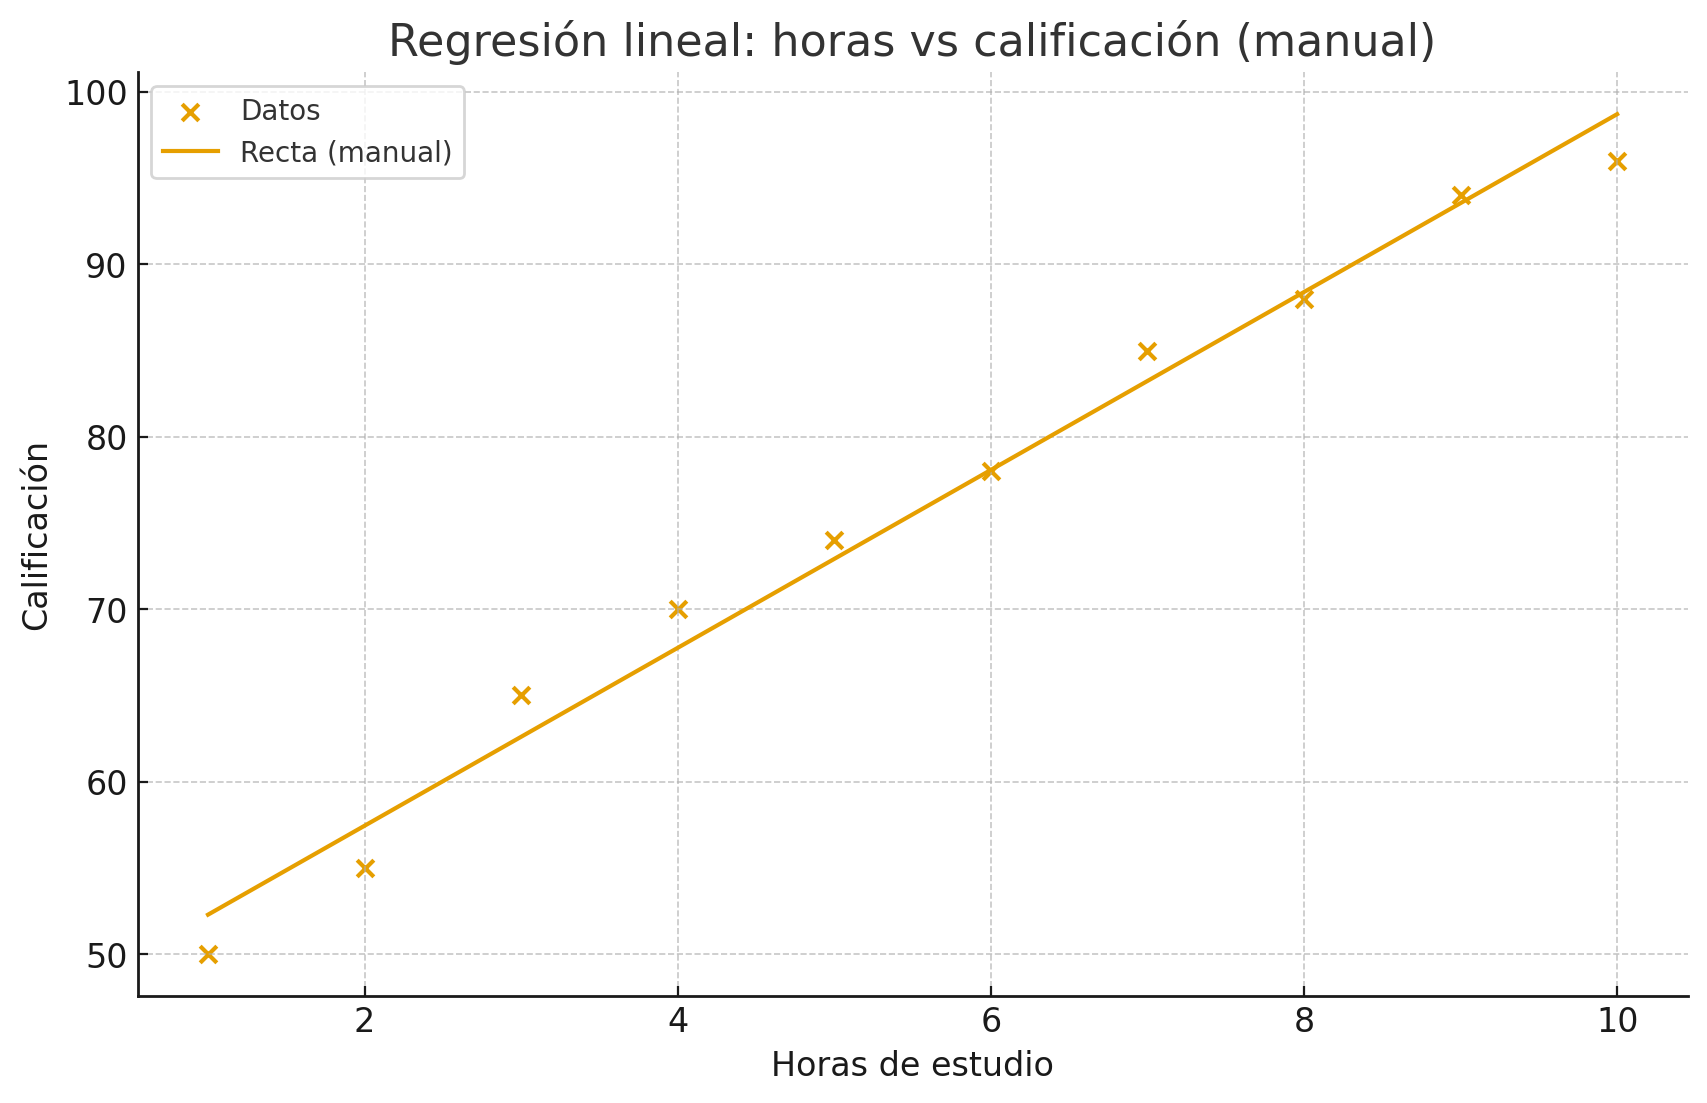

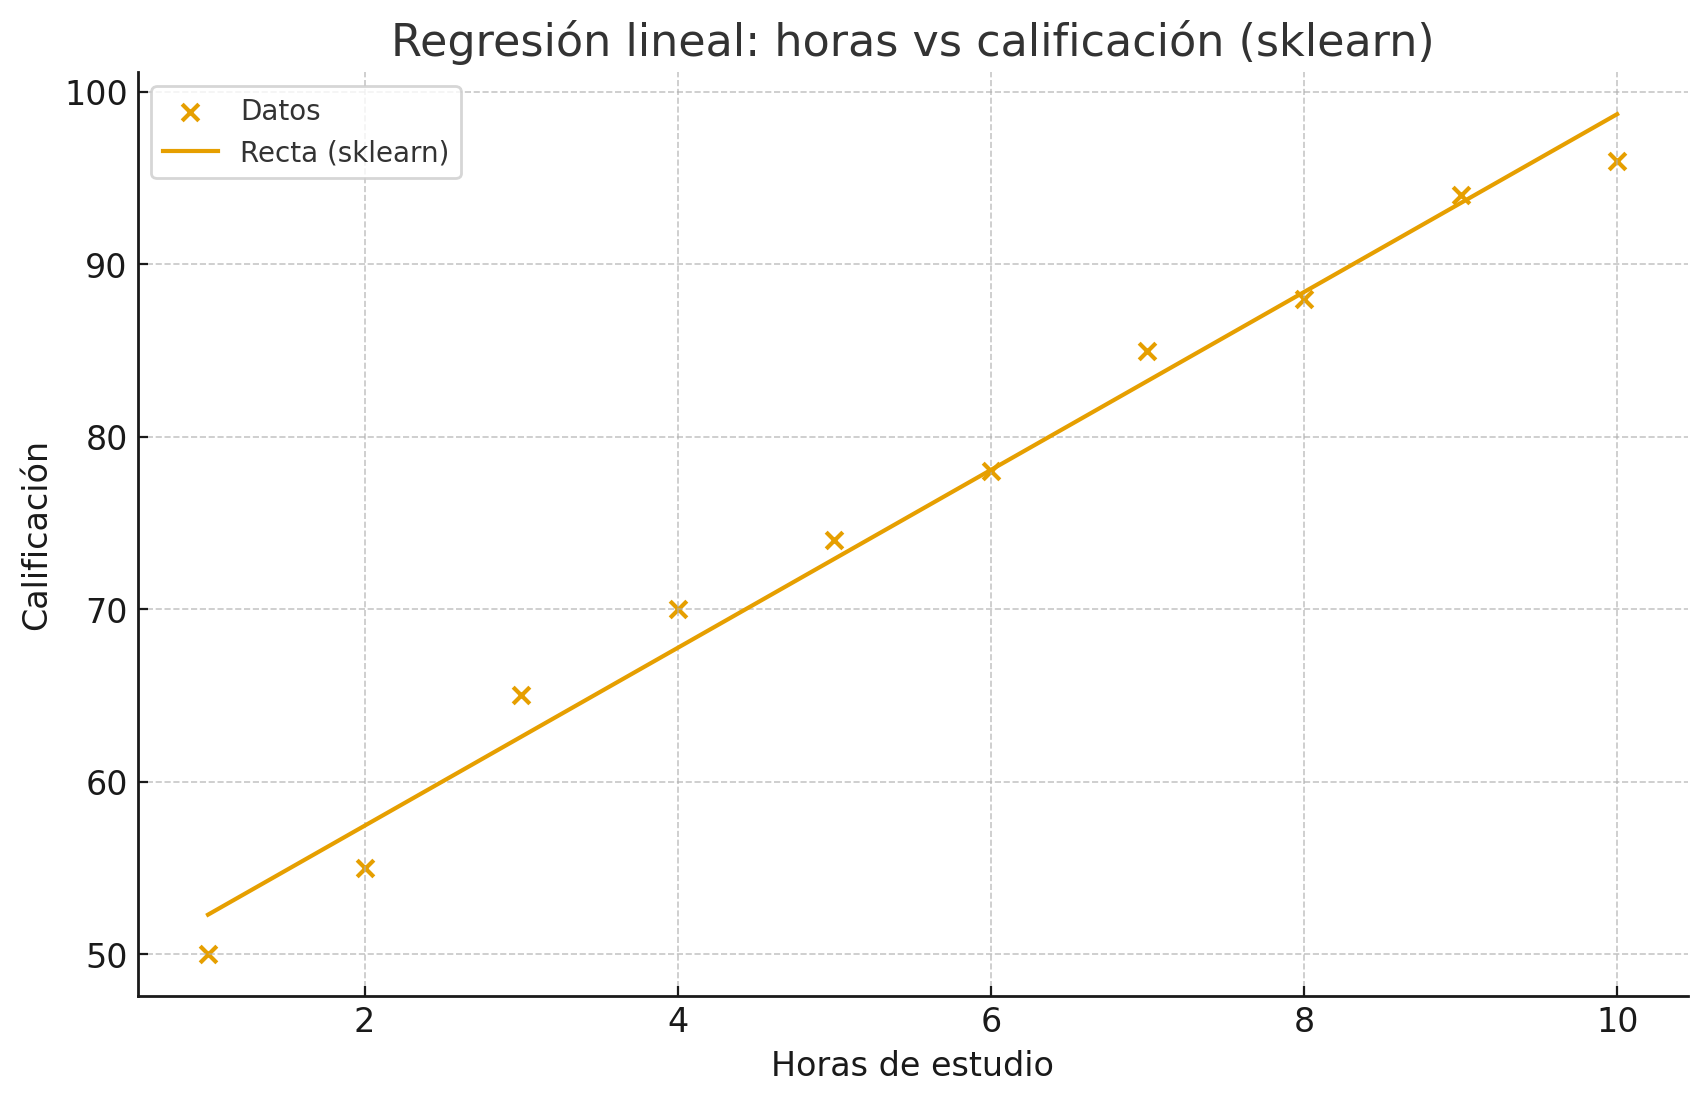

In [5]:
import matplotlib.pyplot as plt

# Dispersión
plt.figure()
plt.scatter(horas, calificaciones, label="Datos")
# Línea (manual)
xs = np.linspace(min(horas), max(horas), 100)
ys = a + b*xs
plt.plot(xs, ys, label="Recta (manual)")
plt.xlabel("Horas de estudio")
plt.ylabel("Calificación")
plt.title("Regresión lineal: horas vs calificación (manual)")
plt.legend()
plt.show()

# Con sklearn
plt.figure()
plt.scatter(horas, calificaciones, label="Datos")
ys2 = modelo.predict(xs.reshape(-1,1))
plt.plot(xs, ys2, label="Recta (sklearn)")
plt.xlabel("Horas de estudio")
plt.ylabel("Calificación")
plt.title("Regresión lineal: horas vs calificación (sklearn)")
plt.legend()
plt.show()


## 6) Interpretación breve
- **Pendiente (b):** incremento esperado de la calificación por cada hora adicional de estudio.
- **Intersección (a):** calificación esperada cuando las horas de estudio son 0 (contextualizar con cautela).
- **R²:** proporción de la variabilidad de la calificación explicada por las horas de estudio.
Ambos enfoques deben dar resultados prácticamente idénticos.